# Fitting a Group of Power Spectra

In this example, we will fit a group of power spectra.

## Load Python libraries

First, we will load the Python modules we need for this example.

In [1]:
# Import some useful standard library modules
import os
from pathlib import Path

# Import some general scientific python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the parameterization model group object
from fooof import FOOOFGroup

# Import useful parameterization related utilities and plot functions
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.plts.periodic import plot_peak_fits, plot_peak_params
from fooof.plts.aperiodic import plot_aperiodic_params, plot_aperiodic_fits

### Check specparam version

In [2]:
# Check which version we are using
import fooof
print(fooof.__version__)

1.0.0


## Set data path

Next, we can set the path to where the data is available.

In [3]:
# Check current directory
os.getcwd()

'/Users/tom/Code/ModCode/param_repos/DevDemo/Code/Jupyter'

In [4]:
# Set the data path to load from
data_path = Path('../../Data/')

## Load group PSDs

Load CSV files, including:
- `freqs.csv`, which contains a vector of frequencies
- `eopPSD.csv`, which contains the power values for a group of power spectrum, one for each subject

In [5]:
# Load csv files containing frequency and power values
freqs = np.ravel(pd.read_csv(data_path / "freqs.csv"))                                                             
spectra = np.array(pd.read_csv(data_path / "eopPSDs.csv"))  

In [6]:
# Check shapes of loaded data
print(freqs.shape)
print(spectra.shape)

(50,)
(60, 50)


## Fit power spectra

Now we can parameterize our group of power spectra!

In [7]:
# Initialize a model object for spectral parameterization, with some settings 
fg = FOOOFGroup(peak_width_limits= [1, 8], max_n_peaks= 8, min_peak_height= 0.05, verbose=False)

In [8]:
# Fit group PSDs over the 2-50 Hz range      
fg.fit(freqs, spectra, [2, 50])

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 60                             
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

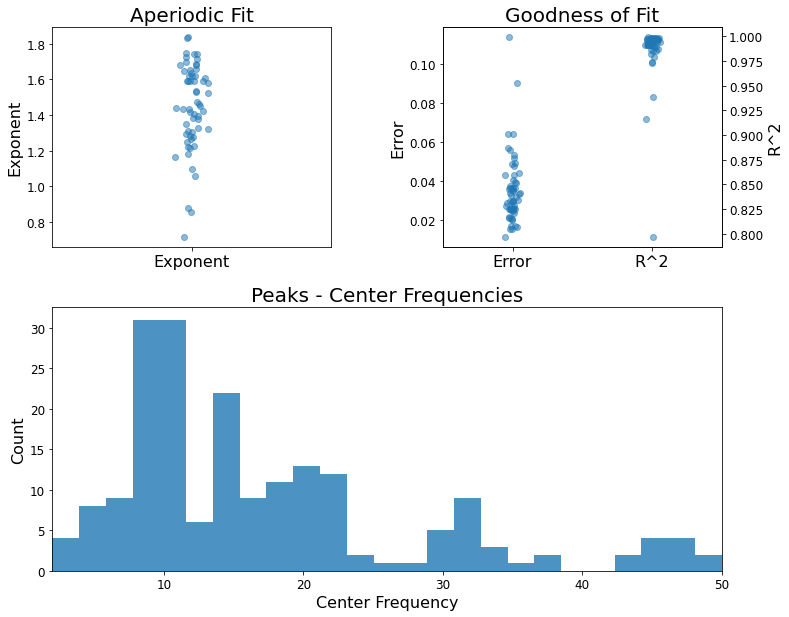

In [9]:
# Print out the group results and plots of fit parameters
fg.print_results()
fg.plot()

## Save fit information

In [10]:
# Save out a copy of the model fit report
fg.save_report('EOP_demo')

# The following line can also be used to save out the group plot
#fg.plot(save_fig=True, file_name="EOP_demo")

## Extract periodic and aperiodic parameters

As with the individual model object, the `get_params` method can be used to access model fit attributes.

In addition, here we will use a `Bands` object and the `get_band_peak_fg` function to organize fit peaks into canonical band ranges.

In [11]:
# Extract aperiodic and full periodic parameters
aps = fg.get_params('aperiodic_params')
peaks = fg.get_params('peak_params')

# Extract group fit information
errors = fg.get_params('error')
r2s = fg.get_params('r_squared')

In [12]:
# Define canonical frequency bands 
bands = Bands({'delta' : [1, 4],
               'theta' : [4, 8],
               'alpha' : [8, 13],
               'beta' : [13, 30]})  

In [13]:
# Extract band-limited peaks information
deltas = get_band_peak_fg(fg, bands.delta)
thetas = get_band_peak_fg(fg, bands.theta)
alphas = get_band_peak_fg(fg, bands.alpha)
betas = get_band_peak_fg(fg, bands.beta)

## Plot model parameters

The specparam module also has functions for plotting the fit parameters. 

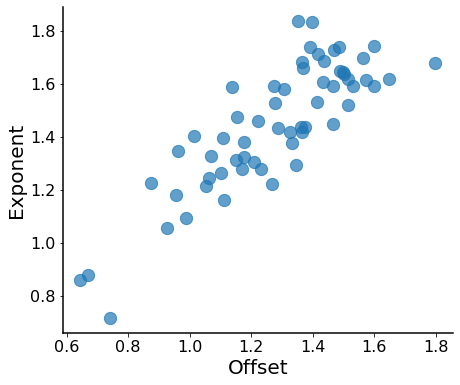

In [14]:
# Plot the measured aperiodic parameters
plot_aperiodic_params(aps)

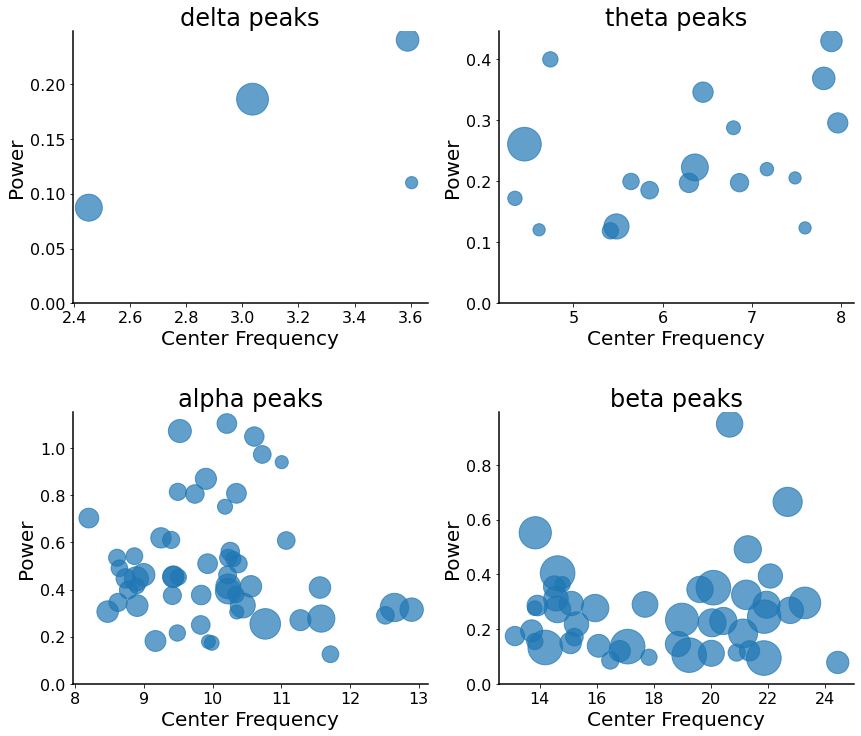

In [15]:
# Plot the parameters for peaks, split up by band
_, axes = plt.subplots(2, 2, figsize=(14, 12))
all_bands = [deltas, thetas, alphas, betas]
for ax, label, peaks in zip(np.ravel(axes), bands.labels, all_bands):
    plot_peak_params(peaks, ax=ax)
    ax.set_title(label + ' peaks', fontsize=24)
plt.subplots_adjust(hspace=0.4)

## Plot model components

We can also plot reconstructions of model components.

In the following, we plot reconstructed alpha peaks and aperiodic components.

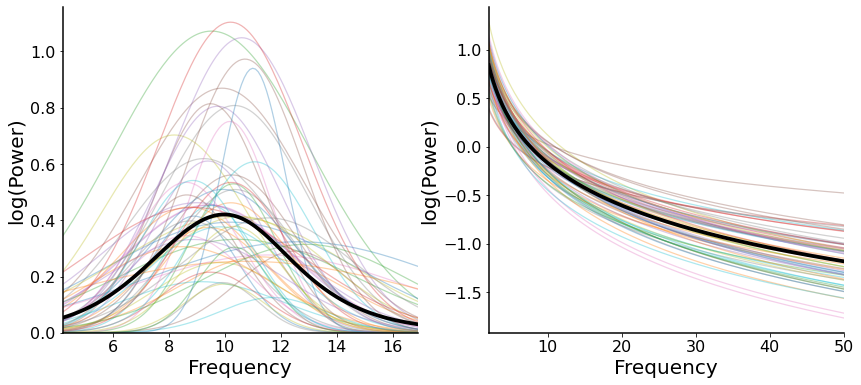

In [16]:
# Plot reconstructions of model components
_, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_peak_fits(alphas, ax=axes[0])
plot_aperiodic_fits(aps, fg.freq_range, ax=axes[1])

## Save out data

The same approach for saving out data is available in the group object, using the `save` method. 

In [17]:
# Save out the settings used to fit the models
fg.save('group_settings', save_settings=True)

# Save out the results of the model fits
fg.save('group_results', save_results=True)

### Reload Data

We can also check our saved out results by reloading them. 

In [18]:
# Reload the saved out group model results
nfg = FOOOFGroup()
nfg.load('group_results')

In [19]:
# Check the results of the reloaded model fit
nfg.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 60                             
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          